### Откройте файлы с данными и объедините их в один датафрейм

In [2079]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import datetime
import numpy as np

In [2080]:
df_movies = pd.read_csv('datasets/mkrf_movies.csv', sep=',', low_memory=False)
# скопируем датафрэйм
copy_data_df_movies = df_movies.copy()
# смотрим общую информацию о датасете
copy_data_df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [2081]:
# в целях объединения таблиц необходимо удалть единственное строковое значение, которое мешает сделать тип данных одинаковым
print(f'Количество строк до удаления {copy_data_df_movies.shape}')
copy_data_df_movies = copy_data_df_movies.loc[df_movies['puNumber'] != 'нет']
print(f'Количество строк после удаления {copy_data_df_movies.shape}')

Количество строк до удаления (7486, 15)
Количество строк после удаления (7485, 15)


In [2082]:
# делаем, чтобы в обеих таблицах был целочисленный тип данных
copy_data_df_movies['puNumber'] = copy_data_df_movies['puNumber'].astype('int64')
copy_data_df_movies['puNumber'].dtypes

dtype('int64')

In [2083]:
df_shows = pd.read_csv('datasets/mkrf_shows.csv', sep=',', low_memory=False)
# скопируем датафрэйм
copy_data_df_shows = df_shows.copy()
# смотрим общую информацию о датасете
copy_data_df_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [ ]:
copy_data_df_shows.describe()

In [2084]:
copy_data_df_shows.duplicated().sum()
# дублей нет. значит можно с помощью merge слить обе таблицы вместе

0

In [2085]:
movies_all = copy_data_df_movies.merge(copy_data_df_shows, on = 'puNumber', how = 'left')

In [2086]:
movies_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

### Предобработка данных

#### Проверьте типы данных

In [2087]:
print(f'Тип данных до изменения: {movies_all['show_start_date'].dtypes}')
movies_all['show_start_date'] = pd.to_datetime(movies_all['show_start_date'], format='%Y-%m-%dT%H:%M:%S.000Z')
print(f'Тип данных после изменения: {movies_all['show_start_date'].dtypes}')

Тип данных до изменения: object
Тип данных после изменения: datetime64[ns]


In [2088]:
# в столбце рейтинг есть значения, разделенные точкой и значений, указанные в процентах. Уберем проценты и точки. Таким образом, рейин будет от 1 до 100
def replace_symbols(string):
    try:
        return float(string.replace('%', '').replace('.', '').strip())
    except:
        return string

In [2089]:
# с учетом пустых значений рейтинг станет вещественным числом
print(f'Тип данных до изменения: {movies_all['ratings'].dtypes}')
movies_all['ratings'] = movies_all['ratings'].apply(replace_symbols)
print(f'Тип данных после изменения: {movies_all['ratings'].dtypes}')

Тип данных до изменения: object
Тип данных после изменения: float64


#### Изучите пропуски в датафрейме

In [2090]:
pd.DataFrame(movies_all.isna().mean()).sort_values(by = 0, ascending=False).style.format('{:.2%}').background_gradient('coolwarm')

,0
refundable_support,95.56%
nonrefundable_support,95.56%
budget,95.56%
financing_source,95.56%
box_office,57.81%
genres,13.03%
ratings,12.91%
producer,7.59%
film_studio,0.24%
director,0.12%


#### Изучите дубликаты в датафрейме

In [2091]:
movies_all['puNumber'].value_counts()

puNumber
221054410    2
221154310    2
221048915    1
121004611    1
121014411    1
            ..
121008915    1
121009015    1
111004115    1
211047015    1
124010719    1
Name: count, Length: 7483, dtype: int64

In [2092]:
movies_all.query('puNumber in (221054410, 221154310)')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4637,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,70.00,"мелодрама,комедия",NaN
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,76.00,"драма,мелодрама,история",NaN
5066,Анализируй это!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,74.00,"комедия,криминал",NaN
5067,Анализируй то!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,68.00,"комедия,криминал",NaN


#### title

In [2093]:
# проверим столбец с наименованием фильмов
movies_all['title'].value_counts()

title
День святого Валентина_                               5
Белоснежка и охотник                                  4
Красавчик-2                                           4
Рапунцель: Запутанная история                         4
Кошмар на улице Вязов /Фильм ужасов/                  4
                                                     ..
Достали!                                              1
МУЛЬТ в кино. Выпуск № 14                             1
Стажёр                                                1
Мэхэббэт - ул йорэк эше (Любовь - это дело сердца)    1
Машины песенки. Серия "Когда цветут кактусы"          1
Name: count, Length: 6771, dtype: int64

In [2094]:
# посмотрим на примере одного фильма почему могут возникать задвоения
movies_all[movies_all['title'] == 'Рапунцель: Запутанная история'] 

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
378,Рапунцель: Запутанная история,224013614,2014-10-10 12:00:00,Анимационный,"Уолт Дисней Анимейшн Студиос, Уолт Дисней Пикчерз",США,"Натан Грино, Байрон Ховард",Рой Конли,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,79.00,"мультфильм,мюзикл,фэнтези",NaN
379,Рапунцель: Запутанная история,224026712,2012-10-23 12:00:00,Анимационный,"Уолт Дисней Анимейшн Студиос, Уолт Дисней Пикчерз",США,"Натан Грино, Байрон Ховард",Рой Конли,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,79.00,"мультфильм,мюзикл,фэнтези",NaN
4377,Рапунцель: Запутанная история,124001910,2010-11-23 12:00:00,Анимационный,"Уолт Дисней Анимейшн Студиос, Уолт Дисней Пикчерз",США,"Натан Грино, Байрон Ховард",Рой Конли,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,79.00,"мультфильм,мюзикл,фэнтези",17055.00
4760,Рапунцель: Запутанная история,224028210,2010-12-31 12:00:00,Анимационный,"Уолт Дисней Анимейшн Студиос, Уолт Дисней Пикчерз",США,"Натан Грино, Байрон Ховард",Рой Конли,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,79.00,"мультфильм,мюзикл,фэнтези",NaN


По ряду фильмов есть несколько строк в датасете из-за того, что прокат по ним шел по нескольким ПУ. При этом кассовые сборы указываются не для всех значений. \
Чтобы удалить дубли:
1. создадим переменную в которую сводной таблицей поместим данные title-box_office
2. создадим новый датасет без ПУ и без box_office, удалим в нем все дубли
3. с помощью join прибавим к нему данные о сборах по всем ПУ.

In [2095]:
# 1. создаем переменную, в которую поместим все данные  о сборах 
title_box_office = movies_all.pivot_table(index='title', values='box_office', aggfunc='sum')
title_box_office[title_box_office.index == 'Рапунцель: Запутанная история']

,box_office
title,
Рапунцель: Запутанная история,17055.00


In [2096]:
# 2.1 Создаем новый датасет и в нем удаляем столбцы с ПУ и кассой
print(f'Размер первоначального датасета: {movies_all.shape}')
movies_all_new = movies_all
movies_all_new.drop('puNumber', axis=1, inplace=True)
movies_all_new.drop('box_office', axis=1, inplace=True)
print(f'Размер нового датасета после удаления столбцов: {movies_all_new.shape}')

Размер первоначального датасета: (7485, 16)
Размер нового датасета после удаления столбцов: (7485, 14)


In [2097]:
# 2.2 Удаляем в новом датасете дубли. Одновременно сортируем по возрастанию, чтобы осталась наиболее ранняя дата.
print(f'Размер датасета до изменения: {movies_all_new.shape}')
movies_all_new = movies_all_new.sort_values(by='show_start_date').drop_duplicates(subset='title')
print(f'Размер датасета после изменения: {movies_all_new.shape}')

Размер датасета до изменения: (7485, 14)
Размер датасета после изменения: (6771, 14)


In [2098]:
# 3. Джоиним
print(f'Размер датасета до изменения: {movies_all_new.shape}')
movies_all_new = movies_all_new.join(title_box_office, on='title')
print(f'Размер датасета после изменения: {movies_all_new.shape}')

Размер датасета до изменения: (6771, 14)
Размер датасета после изменения: (6771, 15)


In [2099]:
# проверяем правильность джоина на примере
movies_all_new[movies_all_new['title'] == 'Рапунцель: Запутанная история']

,title,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4377,Рапунцель: Запутанная история,2010-11-23 12:00:00,Анимационный,"Уолт Дисней Анимейшн Студиос, Уолт Дисней Пикчерз",США,"Натан Грино, Байрон Ховард",Рой Конли,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,79.00,"мультфильм,мюзикл,фэнтези",17055.00


#### Изучите категориальные значения

In [2100]:
# проанализируем столбцы с текстовыми данными
movies_all_new.describe(include = 'object')

,title,type,film_studio,production_country,director,producer,age_restriction,financing_source,genres
count,6771,6771,6754,6769,6762,6212,6771,329,5805
unique,6771,8,5446,943,4786,5306,5,3,742
top,Книга Илая,Художественный,"Киностудия ""Мосфильм""",Россия,О.Семёнова,П.Смирнов,«16+» - для детей старше 16 лет,Министерство культуры,драма
freq,1,3929,339,1793,47,67,2513,163,448


##### type

In [2101]:
movies_all_new['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Научно-популярный',
       'Документальный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

есть неявные дубли в столбце с типами фильмов: есть пробелы в наименованиях ' Анимационный' и ' Художественный'

In [2102]:
movies_all_new['type'] = movies_all_new['type'].str.strip()

In [2103]:
movies_all_new['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Научно-популярный',
       'Документальный', 'Музыкально-развлекательный'], dtype=object)

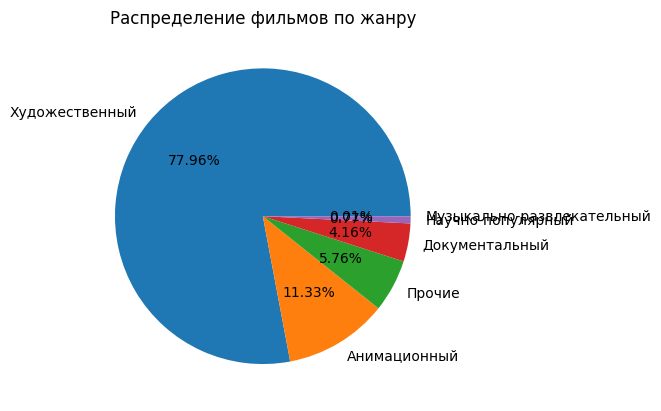

In [2104]:
movies_by_type = movies_all_new['type'].value_counts()
plt.pie(movies_by_type, labels=movies_by_type.index, autopct='%1.2f%%')

plt.title('Распределение фильмов по жанру')

plt.show()

##### country

In [2105]:
movies_all_new['production_country'].unique()

array(['США', 'Россия', 'Великобритания - США', 'США - Великобритания',
       'СССР, Россия', 'США-Аргентина',
       'США - Канада - Германия - Франция', 'США - Германия - Канада',
       'США-Канада-Франция', 'Германия', 'Италия',
       'Франция - Великобритания', 'США-Великобритания', 'Великобритания',
       nan, 'США - Канада', 'Франция', 'СССР', 'США-Франция',
       'Китай - Гонконг', 'Канада - Франция - Великобритания',
       'Испания - Мексика', 'Россия-Казахстан', 'США - Австралия',
       'Индия', 'Россия - Германия', 'Испания - Мальта',
       'США-Великобритания-Франция',
       'США - Франция - Испания - Великобритания', 'США - Германия',
       'Германия-Франция-Великобритания', 'Россия-Италия',
       'Испания - США', 'Эстония', 'Испания',
       'Германия-Австрия-Франция-Италия', 'СССР - ГДР - Польша - Италия',
       'СССР - Италия', 'Испания - Франция', 'Великобритания ',
       'Канада-Бразилия-Япония', 'США - ОАЭ', 'Швеция',
       'Германия - Великобритания - И

In [2106]:
movies_all_new['country_short'] = movies_all_new['production_country'].str.split(',',expand=True)[0]
movies_all_new['country_short'] = movies_all_new['country_short'].str.split('-',expand=True)[0]
movies_all_new['country_short'] = movies_all_new['country_short'].str.strip()

In [2107]:
movies_all_new['country_short'].loc[movies_all_new['country_short'] =='СЩА'] = 'США'
movies_all_new['country_short'].loc[movies_all_new['country_short'] =='CША'] = 'США'
movies_all_new['country_short'].loc[movies_all_new['country_short'] =='Сша'] = 'США'
movies_all_new['country_short'].loc[movies_all_new['country_short'] =='Пуэрто'] = 'Пуэрто-Рико'
movies_all_new['country_short'].loc[movies_all_new['country_short'] =='Республика Корея'] = 'Южная Корея'
movies_all_new['country_short'].loc[movies_all_new['country_short'] =='Республика Узбекистан'] = 'Узбекистан'
movies_all_new['country_short'].loc[movies_all_new['country_short'] =='Республика Казахстан'] = 'Казахстан'
movies_all_new['country_short'].loc[movies_all_new['country_short'] =='Княжество Андорра'] = 'Андорра'
movies_all_new['country_short'].loc[movies_all_new['country_short'] =='Республика Армения'] = 'Армения'
movies_all_new['country_short'].loc[movies_all_new['country_short'] =='Республика Беларусь'] = 'Беларусь'
movies_all_new['country_short'].loc[movies_all_new['country_short'] =='Республика Кипр'] = 'Кипр'
movies_all_new['country_short'].loc[movies_all_new['country_short'] =='Россия'] = 'Россия/СССР'
movies_all_new['country_short'].loc[movies_all_new['country_short'] =='СССР'] = 'Россия/СССР'
movies_all_new['country_short'].loc[movies_all_new['country_short'] =='2019'] = 'нет данных'
movies_all_new['country_short'] = movies_all_new['country_short'].fillna(value = 'нет данных')

C:\Users\TIMUR\AppData\Local\Temp\ipykernel_15632\2688861014.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  movies_all_new['country_short'].loc[movies_all_new['country_short'] =='СЩА'] = 'США'
C:\Users\TIMUR\AppData\Local\Temp\ipykernel

In [2108]:
movies_all_new['country_short'].unique()

array(['США', 'Россия/СССР', 'Великобритания', 'Германия', 'Италия',
       'Франция', 'нет данных', 'Китай', 'Канада', 'Испания', 'Индия',
       'Эстония', 'Швеция', 'Ирландия', 'Греция', 'Южная Корея', 'Литва',
       'Израиль', 'Япония', 'Украина', 'Голландия', 'Дания', 'Норвегия',
       'Австрия', 'КНР', 'Корея', 'Швейцария', 'Румыния', 'Грузия',
       'Мексика', 'Аргентина', 'Бельгия', 'Новая Зеландия', 'Нидерланды',
       'Гонконг', 'Австралия', 'Финляндия', 'Португалия', 'Бразилия',
       'Таиланд', 'Казахстан', 'Польша', 'Латвия', 'Малайзия', 'Иран',
       'Босния и Герцеговина', 'Чили', 'Исландия', 'Чехия', 'ЮАР',
       'Киргизия', 'Узбекистан', 'Сербия', 'Норвения', 'Турция',
       'Беларусь', 'Армения', 'Парагвай', 'Уругвай', 'Азербайджан',
       'Индонезия', 'Болгария', 'Хорватия', 'Чехословакия', 'Венгрия',
       'Македония', 'Венесуэла', 'Люксембург', 'Кипр', 'Перу', 'Андорра',
       'ОАЭ', 'Монголия', 'Сингапур', 'Ливан', 'Колумбия', 'Кения',
       'Пуэрто-Ри

#### Проверьте количественные значения

##### Общие сведения

In [2109]:
# проанализируем столбцы с числовыми данными
pd.set_option('display.float_format', '{:.2f}'.format)
movies_all_new.describe()

,show_start_date,refundable_support,nonrefundable_support,budget,ratings,box_office
count,6771,329.00,329.00,329.00,5814.00,6771.00
mean,2015-04-06 16:19:02.046964992,11653495.44,48059842.89,125146704.98,64.62,35669727.14
min,2010-01-11 12:00:00,0.00,0.00,0.00,10.00,0.00
25%,2012-09-17 12:00:00,0.00,25000000.00,42000000.00,58.00,0.00
50%,2015-04-13 12:00:00,0.00,30000000.00,68490606.00,66.00,0.00
75%,2018-03-01 12:00:00,15000000.00,40000000.00,140025000.00,72.00,1720178.00
max,2019-12-30 12:00:00,180000000.00,400000000.00,2305074303.00,99.00,3073568690.79
std,NaN,24540030.28,57011892.56,183916186.34,11.27,168508499.22


##### Бюджет фильмов 

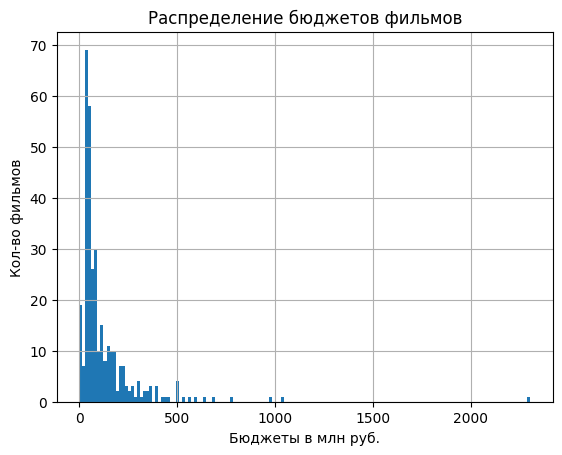

In [2110]:
plt.hist(movies_all_new['budget']/1000000, bins=150)

plt.xlabel('Бюджеты в млн руб.')
plt.ylabel('Кол-во фильмов')
plt.title('Распределение бюджетов фильмов')
plt.grid()
plt.show()

##### Рейтинги фильмов

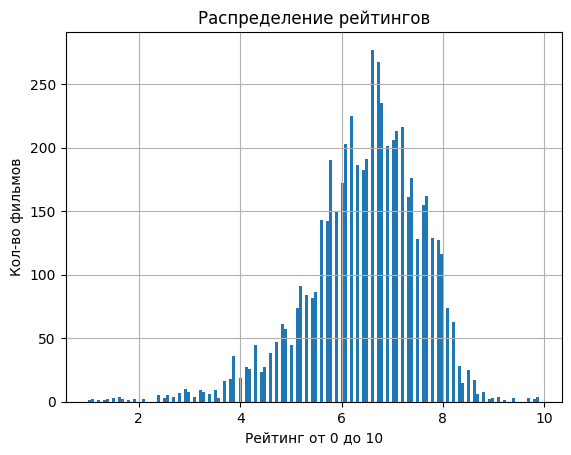

In [2111]:
plt.hist(movies_all_new['ratings']/10, bins=150)

plt.xlabel('Рейтинг от 0 до 10')
plt.ylabel('Кол-во фильмов')
plt.title('Распределение рейтингов')
plt.grid()
plt.show()

##### Сборы

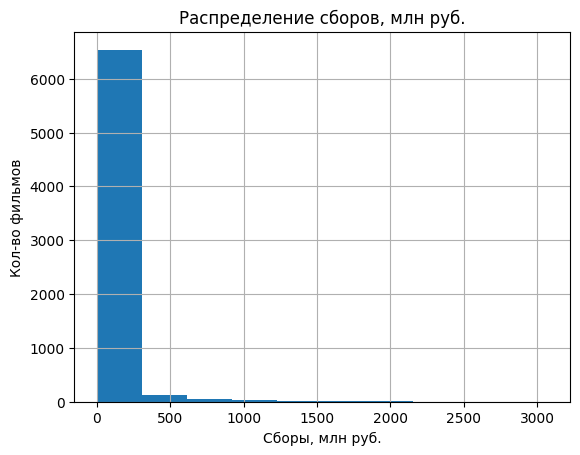

In [2112]:
plt.hist(movies_all_new['box_office']/1000000, bins=10)

plt.xlabel('Сборы, млн руб.')
plt.ylabel('Кол-во фильмов')
plt.title('Распределение сборов, млн руб.')
plt.grid()
plt.show()

##### Гос. финансирование

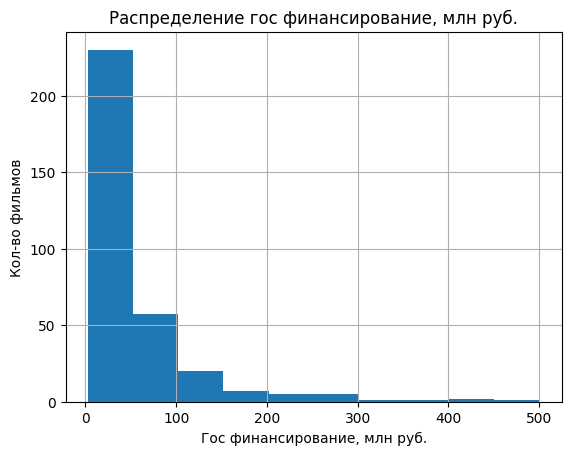

In [2113]:
state_support = movies_all_new.loc[(movies_all_new['refundable_support'] + movies_all_new['nonrefundable_support']) > 0, ['title', 'refundable_support', 'nonrefundable_support']]
state_support['support_overall'] = state_support['refundable_support'] + state_support['nonrefundable_support']

plt.hist(state_support['support_overall']/1000000, bins=10)

plt.xlabel('Гос финансирование, млн руб.')
plt.ylabel('Кол-во фильмов')
plt.title('Распределение гос финансирование, млн руб.')
plt.grid()
plt.show()

##### Проверка сумма поддержки vs бюджет фильма

In [2114]:
movies_all_new.query('budget < (refundable_support +  nonrefundable_support)').shape[0]

17

In [2115]:
print(f"Количество строк с превышением поддержки до изменения {movies_all_new.query('budget < (refundable_support +  nonrefundable_support)').shape[0]}")
movies_all_new['budget'].loc[movies_all_new['budget'] < (movies_all_new['refundable_support'] + movies_all_new['nonrefundable_support'])] = movies_all_new['refundable_support'] + movies_all_new['nonrefundable_support']
print(f"Количество строк с превышением поддержки после изменения {movies_all_new.query('budget < (refundable_support +  nonrefundable_support)').shape[0]}")

Количество строк с превышением поддержки до изменения 17
Количество строк с превышением поддержки после изменения 0


C:\Users\TIMUR\AppData\Local\Temp\ipykernel_15632\3174716965.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  movies_all_new['budget'].loc[movies_all_new['budget'] < (movies_all_new['refundable_support'] + movies_all_new['nonrefundable_su

#### Добавьте новые столбцы

#### year

In [2116]:
movies_all_new['year'] = movies_all_new['show_start_date'].dt.year

In [2117]:
movies_all_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6771 entries, 4455 to 7484
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  6771 non-null   object        
 1   show_start_date        6771 non-null   datetime64[ns]
 2   type                   6771 non-null   object        
 3   film_studio            6754 non-null   object        
 4   production_country     6769 non-null   object        
 5   director               6762 non-null   object        
 6   producer               6212 non-null   object        
 7   age_restriction        6771 non-null   object        
 8   refundable_support     329 non-null    float64       
 9   nonrefundable_support  329 non-null    float64       
 10  budget                 329 non-null    float64       
 11  financing_source       329 non-null    object        
 12  ratings                5814 non-null   float64       
 13  genre

#### genres и director

Создадим столбцы с данными по одному режиссеру (возьмем первого до запятой) и и одному жанру (возьмем также первый жанр до запятой)

In [2118]:
movies_all_new['genres_short'] = movies_all_new['genres'].str.split(',',expand=True)[0]
movies_all_new['director_short'] = movies_all_new['director'].str.split(',',expand=True)[0]

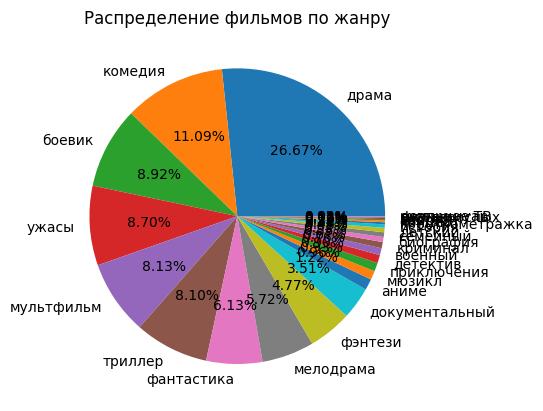

In [2119]:
movies_by_country = movies_all_new['genres_short'].value_counts()
plt.pie(movies_by_country, labels=movies_by_country.index, autopct='%1.2f%%')

plt.title('Распределение фильмов по жанру')

plt.show()

#### state_invest

In [2120]:
movies_all_new['state_invest'] = (movies_all_new['refundable_support'] + movies_all_new['nonrefundable_support']) / movies_all_new['budget']

### Проведите исследовательский анализ данных

#### Фильмы по годам

In [2121]:
movies_all_new['box_status'] = movies_all_new['box_office'] > 0

In [2122]:
film_count_per_year = movies_all_new.pivot_table(index='year', columns='box_status', values='title', aggfunc='count')
film_count_per_year.columns = ['empty', 'fill']
film_count_per_year['fill_part'] = film_count_per_year['fill'] / (film_count_per_year['fill']+film_count_per_year['empty'])
film_count_per_year

,empty,fill,fill_part
year,,,
2010,711,107,0.13
2011,418,107,0.20
2012,414,124,0.23
2013,418,180,0.30
2014,469,271,0.37
2015,188,461,0.71
2016,143,502,0.78
2017,137,355,0.72
2018,401,474,0.54


#### Динамика проката по годам

План решения задачи:
1. Сделать отдельный датасет, где будут только непустые и ненулевые значения box_office.
2. Сделать сводную таблицу, отражающую динамику проката по годам
3. Построить график

In [2123]:
film_with_box_per_year = movies_all_new.loc[movies_all_new['box_office'] > 0]
film_with_box_per_year_sum = film_with_box_per_year.pivot_table(index='year', values='box_office', aggfunc=['sum','count'])
film_with_box_per_year_sum.columns = ['sum','count']
film_with_box_per_year_sum['sum'] = film_with_box_per_year_sum['sum']/1000000
film_with_box_per_year_sum

,sum,count
year,,
2010,17.21,107
2011,29.12,107
2012,7.00,124
2013,29.82,180
2014,7452.90,271
2015,39498.20,461
2016,47860.63,502
2017,48559.03,355
2018,49654.13,474


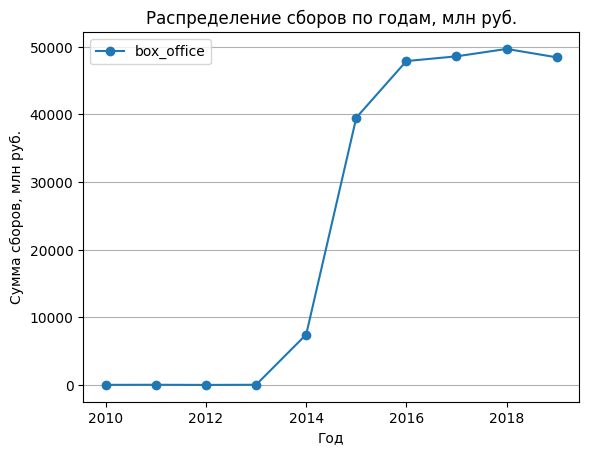

In [2124]:
plt.plot(film_with_box_per_year_sum['sum'], marker='o', label='box_office')

plt.xlabel('Год')
plt.ylabel('Сумма сборов, млн руб.')
plt.title('Распределение сборов по годам, млн руб.')
plt.grid(axis = 'y')
plt.legend()

plt.show()

#### Среднюю и медианную сумму сборов для каждого года

План решения задачи:
1. Взять датасет, в котором непустые и ненулевые значения box_office. Для корректного расчета среднего значения.
2. Создать сводную таблицу, задать правильное наименование колонок

In [2125]:
film_with_box_per_year_pivot = film_with_box_per_year.pivot_table(index='year', values='box_office', aggfunc=['mean','median'])
film_with_box_per_year_pivot.columns = ['mean','median']
film_with_box_per_year_pivot['mean'] = film_with_box_per_year_pivot['mean']/1000000
film_with_box_per_year_pivot['median'] = film_with_box_per_year_pivot['median']/1000000
film_with_box_per_year_pivot

,mean,median
year,,
2010,0.16,0.00
2011,0.27,0.00
2012,0.06,0.01
2013,0.17,0.00
2014,27.50,0.03
2015,85.68,5.03
2016,95.34,4.68
2017,136.79,10.39
2018,104.76,8.82


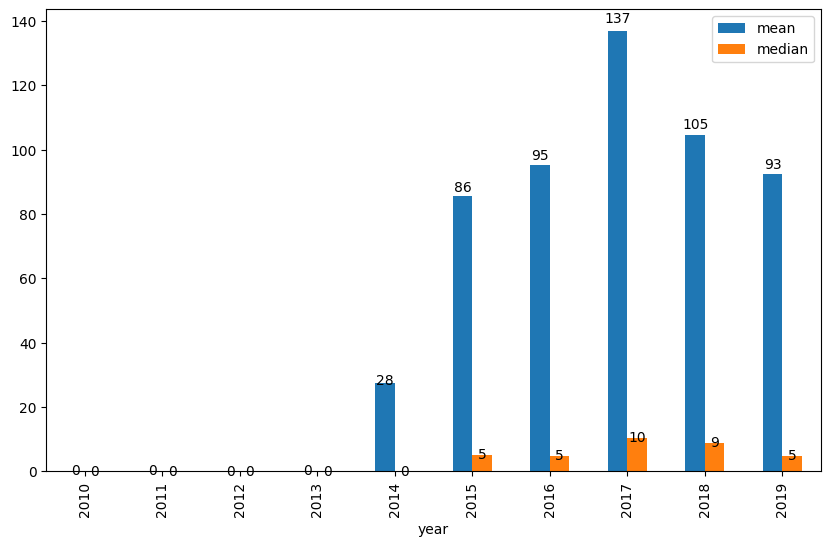

In [2126]:
fig, ax = plt.subplots(figsize=(10, 6))
 
film_with_box_per_year_pivot.plot(kind='bar', ax = ax)
 
# для подписей
for p in ax.patches:
    ax.annotate(str(round(p.get_height())), 
                (p.get_x() + p.get_width()  / 2., p.get_height() * 1.03),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 0), 
                textcoords='offset points')
 
plt.show()

#### Влияние возрастных ограничений

In [2127]:
movies_all_new[['nonrefundable_support','refundable_support','budget','ratings','box_office']].corr()

,nonrefundable_support,refundable_support,budget,ratings,box_office
nonrefundable_support,1.00,0.32,0.59,0.14,0.46
refundable_support,0.32,1.00,0.64,-0.00,0.31
budget,0.59,0.64,1.00,0.10,0.38
ratings,0.14,-0.00,0.10,1.00,0.03
box_office,0.46,0.31,0.38,0.03,1.00


In [2128]:
film_with_box_per_year_agerestr = movies_all_new.loc[movies_all_new['box_office'] > 0][movies_all_new['year'] >= 2015]
film_with_box_per_year_agerestr_pivot = film_with_box_per_year_agerestr.pivot_table(index = 'year', columns='age_restriction', values='box_office', aggfunc='sum')
#film_with_box_per_year_agerestr_pivot['box_office'] = film_with_box_per_year_agerestr_pivot['box_office'] / 1000000
film_with_box_per_year_agerestr_pivot

C:\Users\TIMUR\AppData\Local\Temp\ipykernel_15632\3486235256.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  film_with_box_per_year_agerestr = movies_all_new.loc[movies_all_new['box_office'] > 0][movies_all_new['year'] >= 2015]


age_restriction,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
year,,,,,
2015,379054708.37,13616082008.91,11368957298.77,5432309567.44,8701799571.41
2016,150183298.67,12199395012.39,16663523891.24,6793923428.87,12053607470.24
2017,229598930.00,7851427660.67,18740367775.06,9651495581.02,12086142145.76
2018,32449002.11,14267291660.69,16503883423.96,8745530945.65,10104974623.41
2019,17746066.82,12676553693.67,12750801052.10,10114009267.16,12852548650.86


(2015.0, 2019.0)

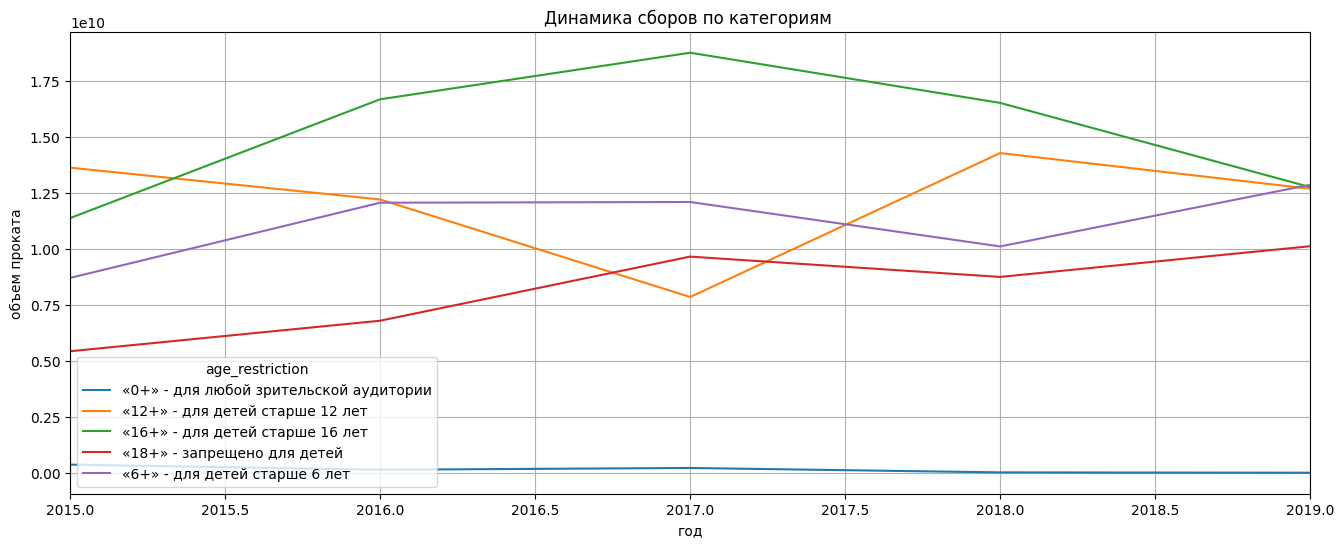

In [2129]:
film_with_box_per_year_agerestr_pivot.plot(
    grid=True, 
    figsize=(16, 6), 
    title = 'Динамика сборов по категориям ').set(
                                     xlabel = 'год', ylabel = 'объем проката');
plt.xlim(2015, 2019)

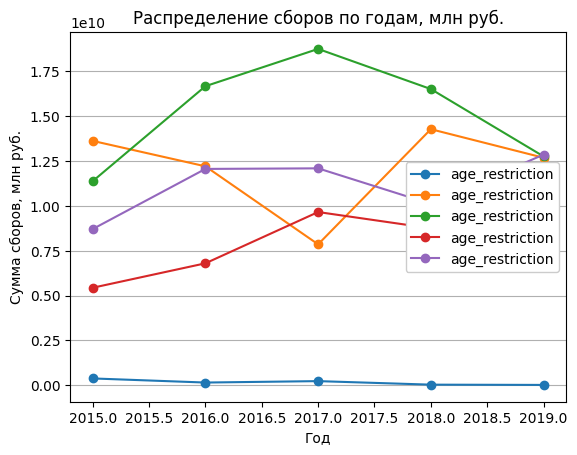

In [2130]:
plt.plot(film_with_box_per_year_agerestr_pivot, marker='o', label = 'age_restriction')

plt.xlabel('Год')
plt.ylabel('Сумма сборов, млн руб.')
plt.title('Распределение сборов по годам, млн руб.')
plt.grid(axis = 'y')
plt.legend(loc = 'right', framealpha = 1)

plt.show()

### Исследуйте фильмы, которые получили государственную поддержку

In [2131]:
film_state_support = movies_all_new.loc[movies_all_new['refundable_support'] + movies_all_new['nonrefundable_support'] > 0]
film_state_support['total_state_support'] = film_state_support['refundable_support'] + film_state_support['nonrefundable_support']
film_state_support.info()

<class 'pandas.core.frame.DataFrame'>
Index: 329 entries, 1498 to 7475
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  329 non-null    object        
 1   show_start_date        329 non-null    datetime64[ns]
 2   type                   329 non-null    object        
 3   film_studio            329 non-null    object        
 4   production_country     329 non-null    object        
 5   director               329 non-null    object        
 6   producer               327 non-null    object        
 7   age_restriction        329 non-null    object        
 8   refundable_support     329 non-null    float64       
 9   nonrefundable_support  329 non-null    float64       
 10  budget                 329 non-null    float64       
 11  financing_source       329 non-null    object        
 12  ratings                313 non-null    float64       
 13  genres

C:\Users\TIMUR\AppData\Local\Temp\ipykernel_15632\1824701058.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  film_state_support['total_state_support'] = film_state_support['refundable_support'] + film_state_support['nonrefundable_support']


In [2132]:
film_state_support[['total_state_support','budget','ratings','box_office']].corr()

,total_state_support,budget,ratings,box_office
total_state_support,1.00,0.72,0.12,0.49
budget,0.72,1.00,0.10,0.38
ratings,0.12,0.10,1.00,0.14
box_office,0.49,0.38,0.14,1.00


In [2133]:
# попали ли фильмы только из России или есть иностранные/совместные
film_state_support_by_year = film_state_support.pivot_table(index='year', values = 'total_state_support', aggfunc='sum')
film_state_support_by_year['total_state_support'] = film_state_support_by_year['total_state_support']/1000000
film_state_support_by_year

,total_state_support
year,
2013,134.35
2014,572.00
2015,3656.24
2016,4303.16
2017,3183.97
2018,3446.97
2019,4349.00


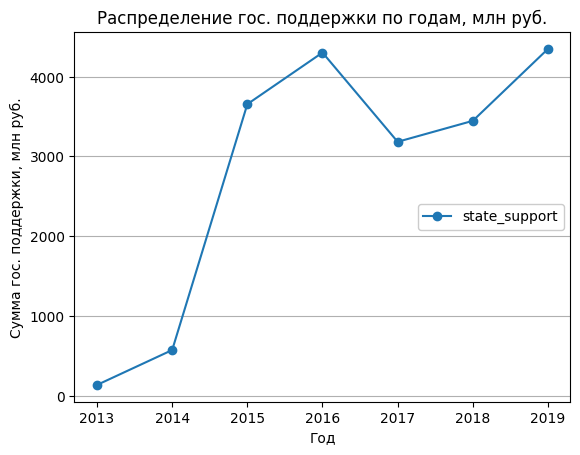

In [2134]:
plt.plot(film_state_support_by_year, marker='o', label = 'state_support')

plt.xlabel('Год')
plt.ylabel('Сумма гос. поддержки, млн руб.')
plt.title('Распределение гос. поддержки по годам, млн руб.')
plt.grid(axis = 'y')
plt.legend(loc = 'right', framealpha = 1)

plt.show()

In [2135]:
# посмотрим на какие 
film_state_support_by_agerestr = film_state_support.pivot_table(index='age_restriction', values = 'total_state_support', aggfunc='sum')
film_state_support_by_agerestr['total_state_support'] = film_state_support_by_agerestr['total_state_support']/1000000
film_state_support_by_agerestr

,total_state_support
age_restriction,
«0+» - для любой зрительской аудитории,273.52
«12+» - для детей старше 12 лет,7274.39
«16+» - для детей старше 16 лет,5539.05
«18+» - запрещено для детей,1012.35
«6+» - для детей старше 6 лет,5546.37


In [2136]:
# посмотрим динамику доли господдержки в общих бюджетах фильмов
film_state_support_vs_budget = film_state_support.query('year > 2013').pivot_table(index='year', values = ['total_state_support','budget','box_office'], aggfunc='sum')
film_state_support_vs_budget['total_state_support'] = film_state_support_vs_budget['total_state_support']/1000000
film_state_support_vs_budget['budget'] = film_state_support_vs_budget['budget']/1000000
film_state_support_vs_budget['box_office'] = film_state_support_vs_budget['box_office']/1000000
film_state_support_vs_budget['total_state_support_to_budget'] = film_state_support_vs_budget['total_state_support'] / film_state_support_vs_budget['budget']
film_state_support_vs_budget['money_return'] = (film_state_support_vs_budget['box_office'] - film_state_support_vs_budget['budget'])/film_state_support_vs_budget['box_office']
film_state_support_vs_budget

,box_office,budget,total_state_support,total_state_support_to_budget,money_return
year,,,,,
2014,1017.42,1302.48,572.00,0.44,-0.28
2015,5785.29,7738.67,3656.24,0.47,-0.34
2016,6081.71,7554.94,4303.16,0.57,-0.24
2017,10865.08,7057.17,3183.97,0.45,0.35
2018,9934.07,7000.66,3446.97,0.49,0.30
2019,8404.19,11655.87,4349.00,0.37,-0.39


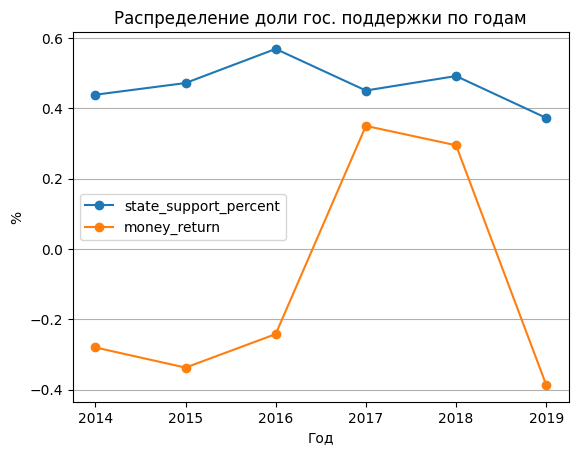

In [2137]:
plt.plot(film_state_support_vs_budget['total_state_support_to_budget'], marker='o', label = 'state_support_percent')
plt.plot(film_state_support_vs_budget['money_return'], marker='o', label = 'money_return')

plt.xlabel('Год')
plt.ylabel('%')
plt.title('Распределение доли гос. поддержки по годам')
plt.grid(axis = 'y')
plt.legend()

plt.show()

In [2138]:
movies_per_director_bysum = movies_all_new.query('box_office > 0').groupby('director_short')['box_office'].agg(['count', 'sum']
                                    ).sort_values(by='sum', ascending = False).reset_index()
movies_per_director_bysum = movies_per_director_bysum.head(10)
movies_per_director_bysum.columns = ['director_short', 'director_count', 'director_sales' ]
movies_per_director_bysum

,director_short,director_count,director_sales
0,К.Шипенко,6,4207964001.35
1,Джо Руссо,3,3532132841.83
2,Дэвид Йейтс,5,3451439972.05
3,Крис Рено,4,3450524575.46
4,Джеймс Ван,5,3037061693.36
5,Кайл Балда,2,3036973282.70
6,А.Мегердичев,2,2779693248.00
7,И.Куликов,2,2722386470.86
8,Дэвид Литч,4,2541557816.92
9,Д.Дьяченко,8,2404920986.12


In [2139]:
movies_per_director_bycount = movies_all_new.query('box_office > 0').groupby('director_short')['box_office'].agg(['count', 'sum']
                                    ).sort_values(by='count', ascending = False).reset_index()
movies_per_director_bycount = movies_per_director_bycount.head(10)
movies_per_director_bycount.columns = ['director_short', 'director_count', 'director_sales' ]
movies_per_director_bycount

,director_short,director_count,director_sales
0,О.Семёнова,14,47412010.51
1,С.Андреасян,11,1162541592.52
2,А.Миронов,9,32257680.96
3,Вуди Аллен,9,277867182.22
4,Е.Салабай,8,32173940.23
5,Д.Дьяченко,8,2404920986.12
6,А.Аксененко,7,214371724.60
7,В.Пономарёв,7,22192291.80
8,Франсуа Озон,6,33498625.04
9,К.Шипенко,6,4207964001.35


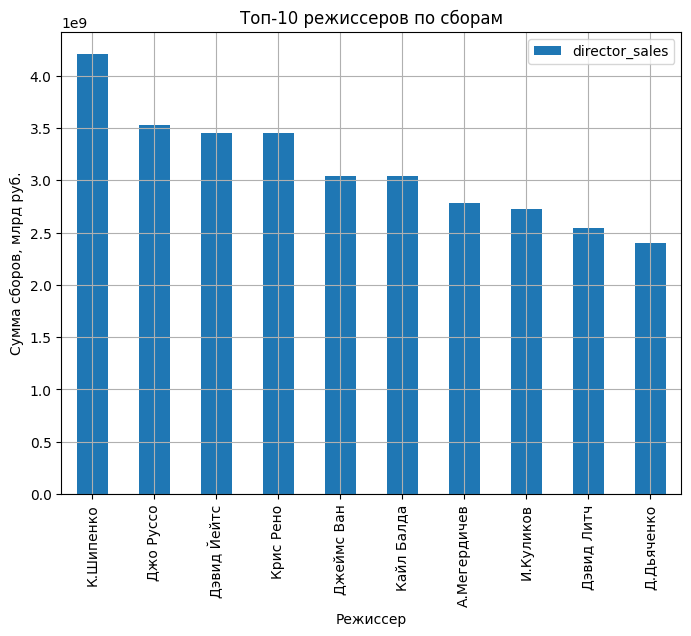

In [2140]:
movies_per_director_bysum.sort_values(by =  'director_sales', ascending= False).plot.bar(
                    x = 'director_short', y = 'director_sales', grid=True, 
                    title='Топ-10 режиссеров по сборам',
                    figsize=(8,6)).set(xlabel='Режиссер', ylabel='Сумма сборов, млрд руб.');

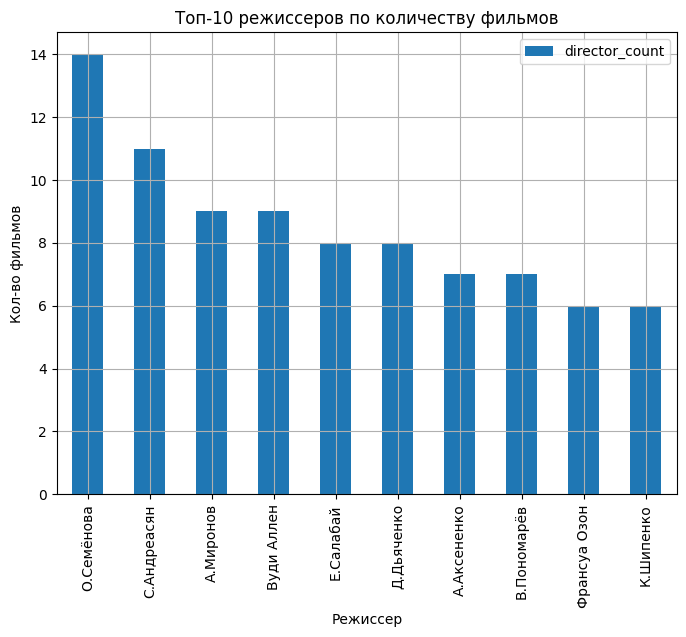

In [2141]:
movies_per_director_bycount.sort_values(by =  'director_count', ascending= False).plot.bar(
                    x = 'director_short', y = 'director_count', grid=True, 
                    title='Топ-10 режиссеров по количеству фильмов',
                    figsize=(8,6)).set(xlabel='Режиссер', ylabel='Кол-во фильмов');

In [2142]:
movies_per_genres_bysum = movies_all_new.query('box_office > 0').groupby('genres_short')['box_office'].agg(['count', 'sum']
                                    ).sort_values(by='sum', ascending = False).reset_index()
movies_per_genres_bysum = movies_per_genres_bysum.head(10)
movies_per_genres_bysum.columns = ['genres_short', 'genres_count', 'genres_sales' ]
movies_per_genres_bysum

,genres_short,genres_count,genres_sales
0,фантастика,174,50986431810.00
1,мультфильм,326,36959939316.08
2,боевик,234,27598666334.18
3,фэнтези,142,26508737382.60
4,комедия,366,24476443354.63
5,драма,682,19129869724.28
6,ужасы,264,16624149924.51
7,триллер,216,7697875038.03
8,спорт,6,3122188715.44
9,история,19,2819045452.06


In [2143]:
movies_per_genres_bycount = movies_all_new.query('box_office > 0').groupby('genres_short')['box_office'].agg(['count', 'sum']
                                    ).sort_values(by='count', ascending = False).reset_index()
movies_per_genres_bycount = movies_per_genres_bycount.head(10)
movies_per_genres_bycount.columns = ['genres_short', 'genres_count', 'genres_sales' ]
movies_per_genres_bycount

,genres_short,genres_count,genres_sales
0,драма,682,19129869724.28
1,комедия,366,24476443354.63
2,мультфильм,326,36959939316.08
3,ужасы,264,16624149924.51
4,боевик,234,27598666334.18
5,триллер,216,7697875038.03
6,фантастика,174,50986431810.00
7,фэнтези,142,26508737382.60
8,мелодрама,114,2325006771.89
9,документальный,97,232753312.22


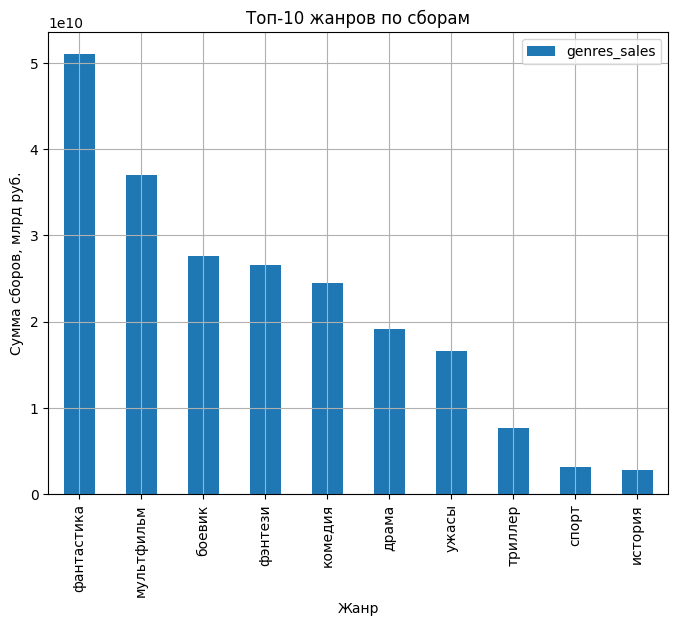

In [2144]:
movies_per_genres_bysum.sort_values(by =  'genres_sales', ascending= False).plot.bar(
                    x = 'genres_short', y = 'genres_sales', grid=True, 
                    title='Топ-10 жанров по сборам',
                    figsize=(8,6)).set(xlabel='Жанр', ylabel='Сумма сборов, млрд руб.');

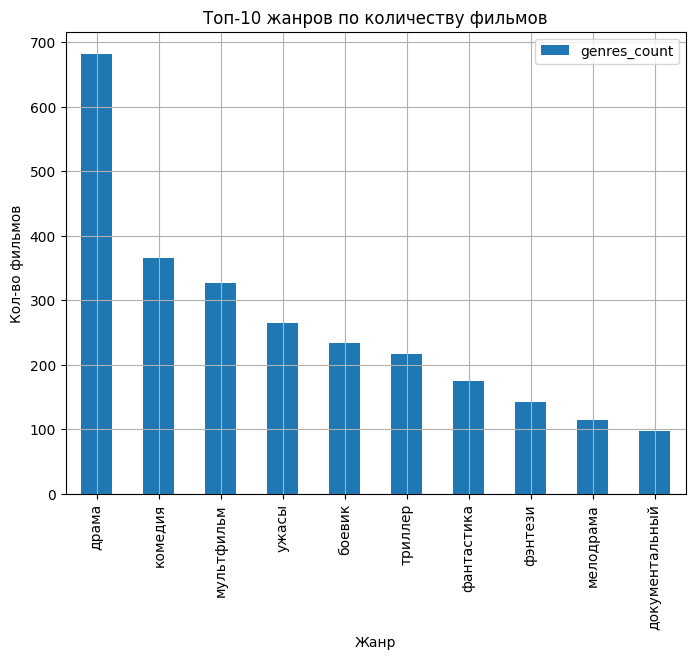

In [2145]:
movies_per_genres_bycount.sort_values(by =  'genres_count', ascending= False).plot.bar(
                    x = 'genres_short', y = 'genres_count', grid=True, 
                    title='Топ-10 жанров по количеству фильмов',
                    figsize=(8,6)).set(xlabel='Жанр', ylabel='Кол-во фильмов');